In [15]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [16]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u #simple normalize

In [17]:
def model1(t_u, w, b):     #linear model 
    return w * t_u + b

In [18]:
def model2(t_u, w1, w2, b):   #non-linear model 
    return w2*t_u**2+w1*t_u+b

In [19]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [20]:
params = torch.tensor([1.0, 1.0,1.0], requires_grad=True)

In [21]:
params.grad is None

True

In [22]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([3.6191e+05, 2.3155e+07, 5.9662e+03])

In [23]:
if params.grad is not None:
    params.grad.zero_()

In [24]:
def training_loop_nonlinear(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model2(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [25]:
def training_loop_linear(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model1(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [28]:
params_linear=training_loop_linear(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 8.420959
Epoch 1000, Loss 3.930977
Epoch 1500, Loss 3.110900
Epoch 2000, Loss 2.961117
Epoch 2500, Loss 2.933759
Epoch 3000, Loss 2.928763
Epoch 3500, Loss 2.927850
Epoch 4000, Loss 2.927683
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927647


In [29]:
params_nonlinear=training_loop_nonlinear(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0,-4.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 3.833239
Epoch 1000, Loss 3.505254
Epoch 1500, Loss 3.271483
Epoch 2000, Loss 3.104728
Epoch 2500, Loss 2.985644
Epoch 3000, Loss 2.900472
Epoch 3500, Loss 2.839422
Epoch 4000, Loss 2.795531
Epoch 4500, Loss 2.763847
Epoch 5000, Loss 2.740847


In [30]:
params_linear

tensor([  5.3671, -17.3010], requires_grad=True)

In [31]:
params_nonlinear

tensor([ 0.2075,  0.4763, -4.3893], requires_grad=True)

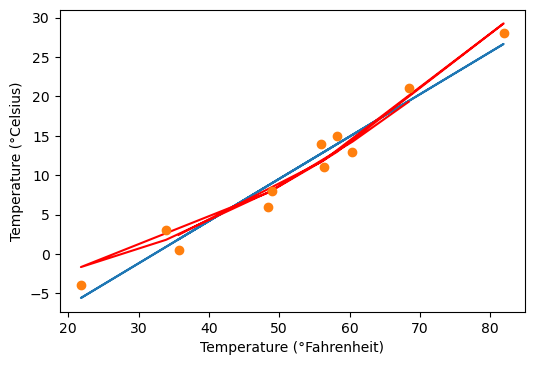

<Figure size 600x400 with 0 Axes>

In [34]:
from matplotlib import pyplot as plt

lin = model1(t_un, *params_linear)  # <1>
nonlin= model(t_un, *params_nonlinear)
fig = plt.figure(dpi=100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), lin.detach().numpy()) # <2>
plt.plot(t_u.numpy(), nonlin.detach().numpy(),'r') # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png") 
